In [12]:
import pandas as pd

df = pd.read_csv(r"C:/Users/ranje/sales-data-dashboard/data/cleaned_sales.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9894 entries, 0 to 9893
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9894 non-null   int64  
 1   order_id       9894 non-null   object 
 2   order_date     9894 non-null   object 
 3   ship_date      9894 non-null   object 
 4   ship_mode      9894 non-null   object 
 5   customer_id    9894 non-null   object 
 6   customer_name  9894 non-null   object 
 7   segment        9894 non-null   object 
 8   country        9894 non-null   object 
 9   city           9894 non-null   object 
 10  state          9894 non-null   object 
 11  postal_code    9894 non-null   int64  
 12  region         9894 non-null   object 
 13  product_id     9894 non-null   object 
 14  category       9894 non-null   object 
 15  sub-category   9894 non-null   object 
 16  product_name   9894 non-null   object 
 17  sales          9894 non-null   float64
 18  quantity

,row_id,postal_code,sales,quantity,discount,profit,total_sales,year,month,day
count,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000
mean,4994.175662,55258.275622,186.392229,3.765616,0.156473,20.053044,186.392229,2015.723166,7.815747,15.465838
std,2883.394648,32037.580817,323.606129,2.208377,0.206844,120.849844,323.606129,1.123558,3.281267,8.750215
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-3701.892800,0.444000,2014.000000,1.000000,1.000000
25%,2496.250000,23223.000000,17.042500,2.000000,0.000000,1.712025,17.042500,2015.000000,5.000000,8.000000
50%,4990.500000,57252.000000,52.575000,3.000000,0.200000,8.496600,52.575000,2016.000000,9.000000,15.000000
75%,7487.750000,90008.000000,201.026000,5.000000,0.200000,28.512750,201.026000,2017.000000,11.000000,23.000000
max,9994.000000,99301.000000,2479.960000,14.000000,0.800000,1114.512000,2479.960000,2017.000000,12.000000,31.000000


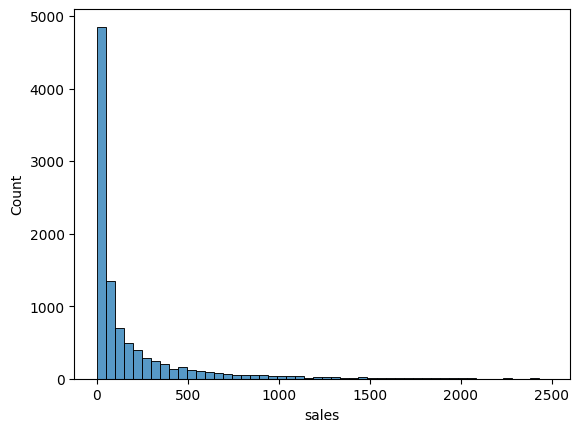

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['sales'], bins=50)
plt.show()


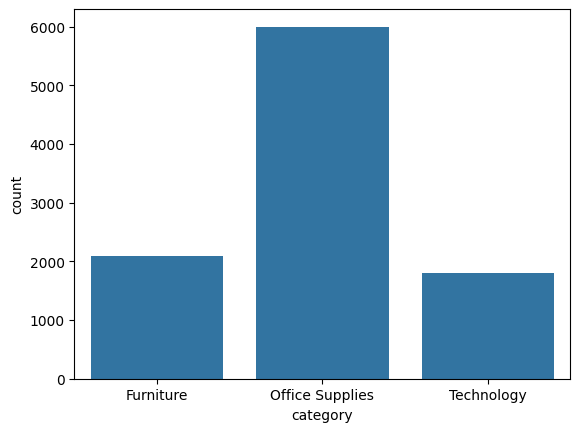

In [14]:
sns.countplot(data=df, x='category')
plt.show()


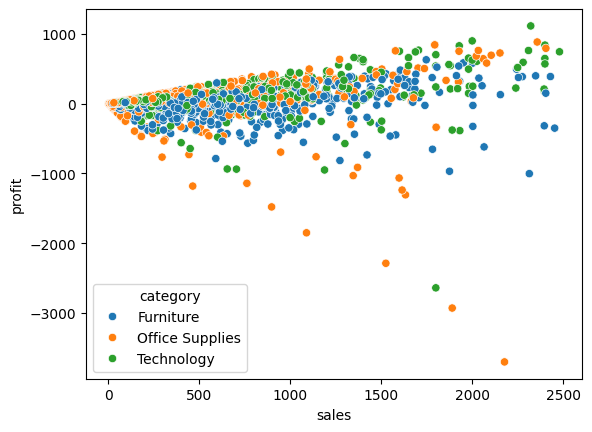

In [15]:
sns.scatterplot(data=df, x='sales', y='profit', hue='category')
plt.show()


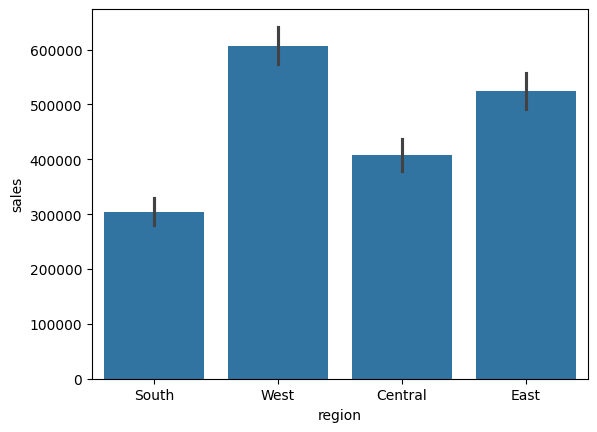

In [16]:
sns.barplot(data=df, x='region', y='sales', estimator=sum)
plt.show()


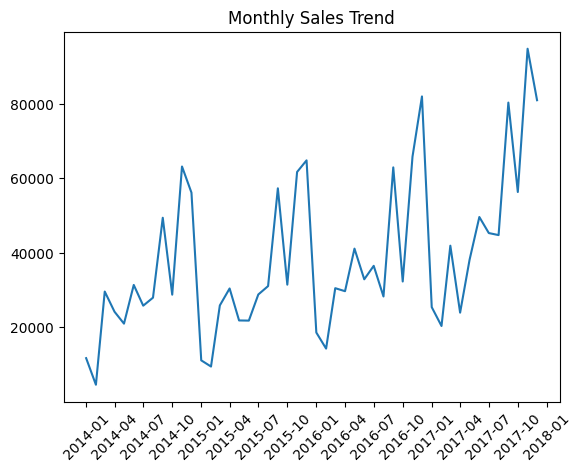

In [17]:
import matplotlib.dates as mdates
monthly_sales = df.groupby(['year','month'])['sales'].sum().reset_index()
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year','month']].assign(day=1))


plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.title("Monthly Sales Trend")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # show every 3rd month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.show()


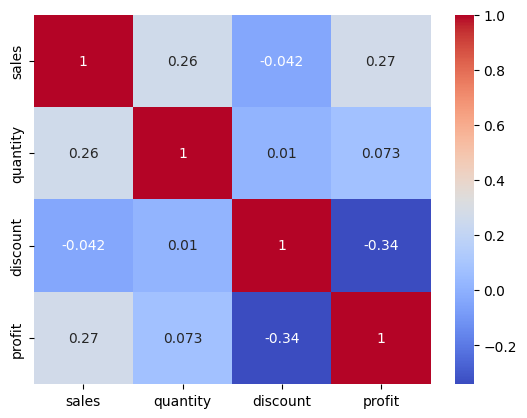

In [20]:
corr = df[['sales', 'quantity', 'discount', 'profit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


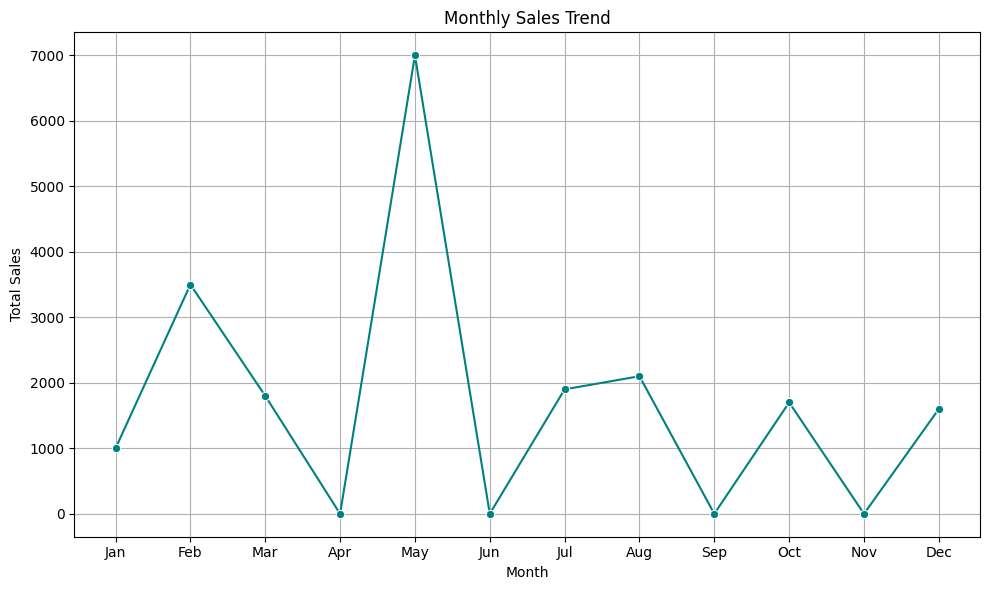

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample MSME sales data
data = {
    "month": [1, 2, 2, 3, 5, 5, 5, 7, 8, 10, 12],
    "sales": [1000, 1500, 2000, 1800, 2200, 2500, 2300, 1900, 2100, 1700, 1600]
}
df = pd.DataFrame(data)

# Step 1: Aggregate monthly sales and reindex to ensure all months are present
monthly_sales = df.groupby("month")["sales"].sum().reindex(range(1, 13)).fillna(0)

# Step 2: Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.tight_layout()
plt.show()